# Predict the Gross of VOX Cinema
### Vox cinema will use the IMDB data to know if the movie will earn based on similar movie views and gross.


project parts:
1.   Data Understaning
2.   Data Cleaning
3.   Data Modeling
4.   Data Analysis
5.   Linear Regression
6.   Improve 



In [ ]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt

plt.style.use('default')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import RepeatedKFold


In [ ]:
from google.colab import files
file = files.upload()

Saving imdb_dataset_clean.csv to imdb_dataset_clean (1).csv


# Data Cleaning
#### The code is in a separate file, you can view it through the following link: 
[THE DATA CLEANING CODE](https://colab.research.google.com/drive/1VxAX_A56cS8uXaNyM_BQKsEidVU0NFF1?authuser=1#scrollTo=0137bb4c&line=1&uniqifier=1)

# Data Understanding

In [ ]:
df = pd.read_csv("imdb_dataset_clean.csv")

In [ ]:
df.drop(["Unnamed: 0"], axis=1, inplace= True)
df.drop(["IsScored"], axis=1, inplace= True)

In [ ]:
df


,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,No_of_Votes,Gross,Dir_class,Cast_class
0,1994,0,142,0,9.3,2343.110,28.341469,0,0
1,1972,0,175,1,9.2,1620.367,134.966411,0,0
2,2008,1,152,0,9.0,2303.232,534.858444,2,3
3,1974,0,202,1,9.0,1129.952,57.300000,0,0
4,1957,2,96,1,9.0,689.845,4.360000,0,0
...,...,...,...,...,...,...,...,...,...
745,1971,2,157,1,7.6,30.144,0.696690,3,0
746,1970,2,144,0,7.6,45.338,1.378435,0,0
747,1967,2,78,2,7.6,166.409,141.843612,0,0
748,1964,2,87,2,7.6,40.351,13.780024,0,0


In [ ]:
df.describe()

,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,No_of_Votes,Gross,Dir_class,Cast_class
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,1995.070667,0.854667,123.302667,0.672000,7.934800,342.132672,74.952069,0.546667,0.425333
std,19.496029,0.845280,26.020745,0.728325,0.289103,350.979482,113.328043,1.003244,0.801633
min,1925.000000,0.000000,71.000000,0.000000,7.600000,25.198000,0.001305,0.000000,0.000000
25%,1986.000000,0.000000,104.000000,0.000000,7.700000,88.547250,5.014811,0.000000,0.000000
50%,2001.000000,1.000000,120.000000,1.000000,7.900000,219.734000,31.900000,0.000000,0.000000
75%,2010.000000,2.000000,136.000000,1.000000,8.100000,481.218500,98.091571,1.000000,1.000000
max,2019.000000,2.000000,238.000000,2.000000,9.300000,2343.110000,936.662225,3.000000,3.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Released_Year  750 non-null    int64  
 1   Certificate    750 non-null    int64  
 2   Runtime        750 non-null    int64  
 3   Genre          750 non-null    int64  
 4   IMDB_Rating    750 non-null    float64
 5   No_of_Votes    750 non-null    float64
 6   Gross          750 non-null    float64
 7   Dir_class      750 non-null    int64  
 8   Cast_class     750 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 52.9 KB


Choosing the feature columns, which are: IMDB_Rating, No_of_Votes, Released_Year, Genre, Released_Year, RunTime

In [ ]:
df_features = ['Released_Year','Runtime','No_of_Votes','IMDB_Rating','Cast_class','Genre']

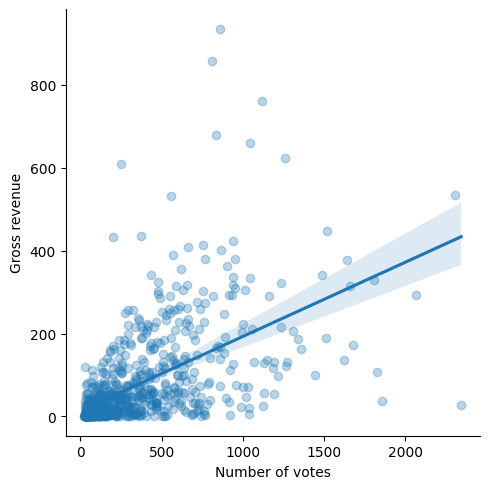

In [ ]:
ax = sns.lmplot(data=df, x='No_of_Votes', y='Gross', scatter_kws={'alpha':0.3})
ax.set(xlabel='Number of votes', ylabel='Gross revenue')

#####Trying different features

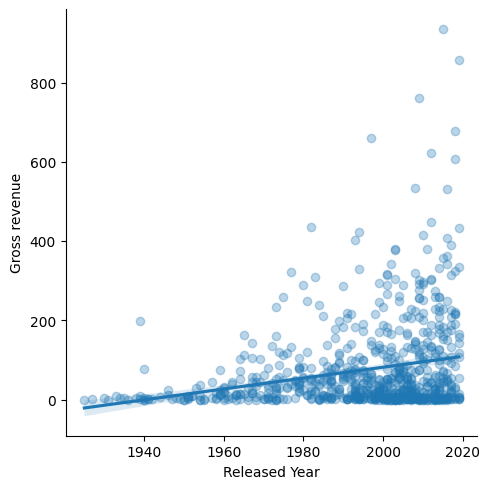

In [ ]:
ax = sns.lmplot(data=df, x='Released_Year', y='Gross', scatter_kws={'alpha':0.3})
ax.set(xlabel='Released Year', ylabel='Gross revenue')

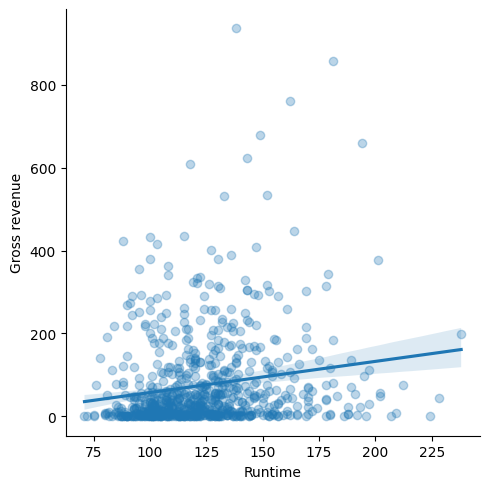

In [ ]:
ax = sns.lmplot(data=df, x='Runtime', y='Gross',scatter_kws={'alpha':0.3})
ax.set(xlabel='Runtime', ylabel='Gross revenue')

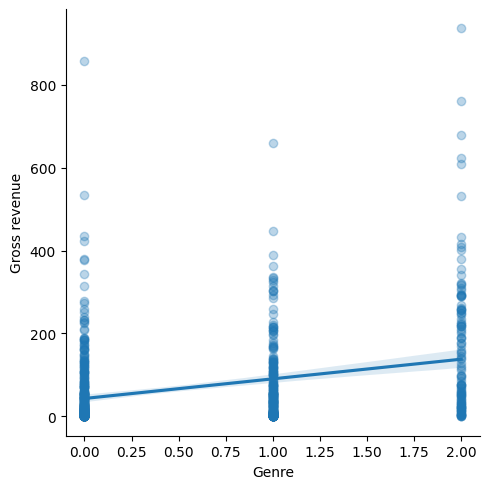

In [ ]:
ax = sns.lmplot(data=df, x='Genre', y='Gross', scatter_kws={'alpha':0.3})
ax.set(xlabel='Genre', ylabel='Gross revenue')

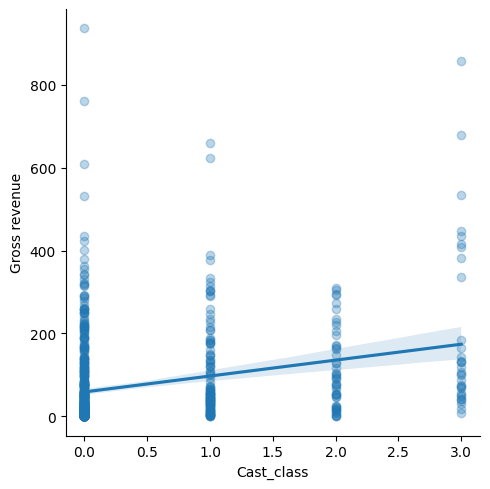

In [ ]:
ax = sns.lmplot(data=df, x='Cast_class', y='Gross', scatter_kws={'alpha':0.3})
ax.set(xlabel='Cast_class', ylabel='Gross revenue')

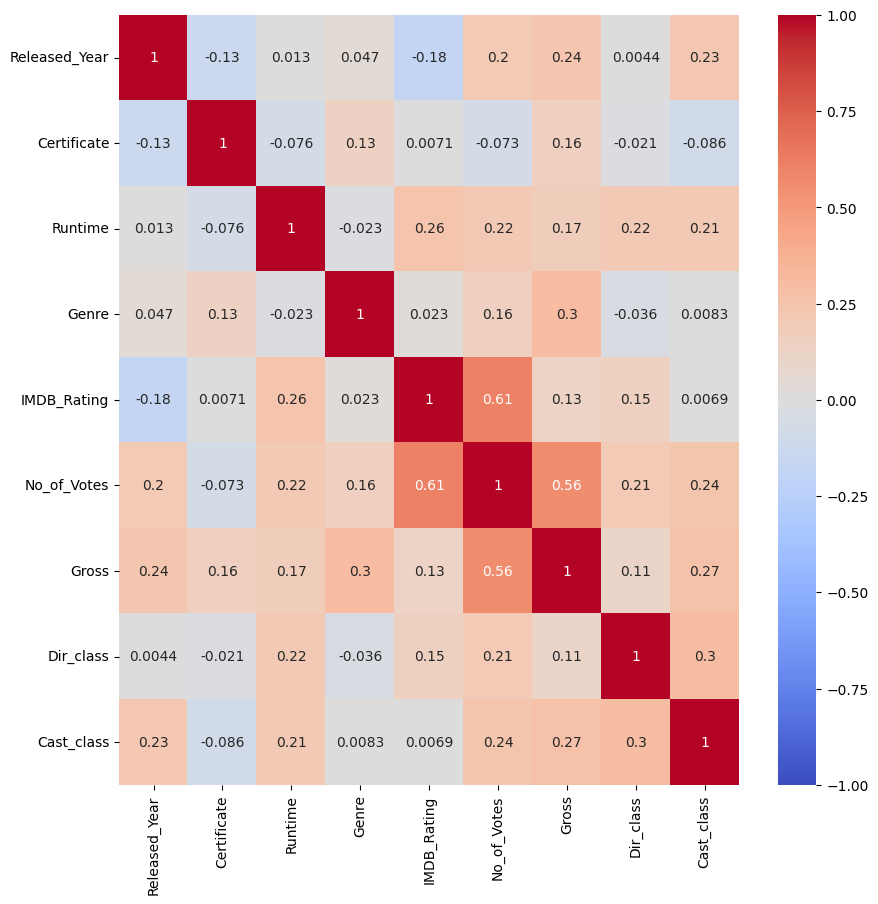

In [ ]:
fig = plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm')

We conclude that there is no Correlation between most of the columns with the Gross except the No_of_Votes column.


####Define Features And Target


After removing columns that has no relation
x--> feature
y--> target

In [ ]:
#selected features is No_of_Votes
feature = ['No_of_Votes']
X = df[feature].values
# Label
label = ["Gross"]
y = df[label] # dependent variable


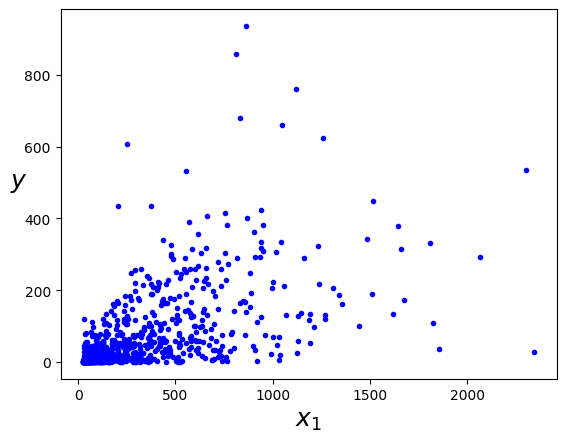

In [ ]:
#Plot the graph
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

#Spliting The Train Test Data

split data into training and testing

In [ ]:
#split data into 80-20, 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
#x_train has trainig data of independent features
#y_train has trainig data of dndependent variables
#x_test  has testing data of independent features
#test has testing data of dndependent variables
#test_size is 0.2 , means 20%


In [ ]:
#X and Y shapes
print(X_train.shape)
print(y_train.shape)
np.array(X_train)
np.array(y_train)

print(X_test.shape)
print(y_test.shape)
print(y.shape)
print(X.shape)

(600, 1)
(600, 1)
(150, 1)
(150, 1)
(750, 1)
(750, 1)


# Linear Regression

In [ ]:
trainLinearReg = LinearRegression()
trainLinearReg.fit(X_train,y_train)

trainYPred=trainLinearReg.predict(X_train)
testYPred=trainLinearReg.predict(X_test)


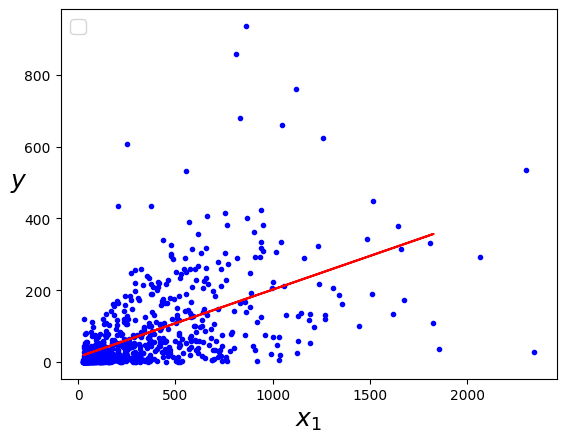

In [ ]:
plt.plot(X, y, "b.") #plot data
plt.plot(X_test,testYPred,"r-"); #plot prediction

plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.show()

In [ ]:
print("Training error")

print("Mean absolute error: %.2f" % mean_absolute_error(y_train, trainYPred))
print("root mean square error %.2f" % math.sqrt(mean_squared_error(y_train, trainYPred)))
print("Mean sum of squares (MSE) : %.2f" % mean_squared_error(y_train, trainYPred))

Training error
Mean absolute error: 60.13
root mean square error 99.79
Mean sum of squares (MSE) : 9957.17


In [ ]:
print("Testing error")

print("Mean absolute error: %.2f" % mean_absolute_error(y_test, testYPred))
print("root mean square error %.2f" % math.sqrt(mean_squared_error(y_test, testYPred)))
print("Mean sum of squares (MSE) : %.2f" % mean_squared_error(y_test, testYPred))

Testing error
Mean absolute error: 48.32
root mean square error 67.88
Mean sum of squares (MSE) : 4608.22


Based on the root mean square error this model fits well, because the difference between the train and test.

#PolynomialFeatures

Trying different Degree of polynomial.


Second Polynomial Degree

In [ ]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([-5.79002718]), array([[ 2.94974283e-01, -8.40490072e-05]]))

In [ ]:
X_new= np.linspace(0, 2000, 750).reshape(750, 1)
X_new_poly = poly_features.transform(X_new)
polytrainYpred= lin_reg.predict(X_poly)
polytestYnew = lin_reg.predict(X_new_poly)



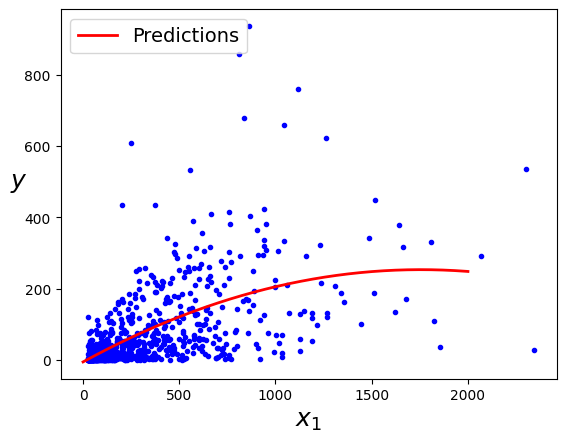

In [ ]:
#Plotting the graph
plt.plot(X, y, "b.")
plt.plot(X_new, polytestYnew, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.show()


In [ ]:
print("Training Errors")

print("Mean absolute error: %.2f" % mean_absolute_error(y, polytrainYpred))
print("root mean square error %.2f" % math.sqrt(mean_squared_error(y, polytrainYpred)))
print("Mean sum of squares (MSE) : %.2f" % mean_squared_error(y, polytrainYpred))
print("----------------")
print("Testing Errors")
print("Mean absolute error: %.2f" % mean_absolute_error(polytestYnew, y))
print("root mean square error %.2f" % math.sqrt(mean_squared_error(polytestYnew, y)))
print("Mean sum of squares (MSE) : %.2f" % mean_squared_error(polytestYnew, y))


Training Errors
Mean absolute error: 55.43
root mean square error 92.31
Mean sum of squares (MSE) : 8521.56
----------------
Testing Errors
Mean absolute error: 152.39
root mean square error 177.55
Mean sum of squares (MSE) : 31523.86


Third Degree Polynomial

In [ ]:
poly_features3 = PolynomialFeatures(degree=3, include_bias=False)
X_poly3 = poly_features3.fit_transform(X)
X[0]

lin_reg3 = LinearRegression()
lin_reg3.fit(X_poly3, y)
lin_reg3.intercept_, lin_reg.coef_

(array([-6.32682454]), array([[ 2.94974283e-01, -8.40490072e-05]]))

In [ ]:
X_new3= np.linspace(0, 2000, 750).reshape(750, 1)
X_new_poly3 = poly_features3.transform(X_new3)
polytrainYpred3 = lin_reg3.predict(X_poly3)
polytestYnew3= lin_reg3.predict(X_new_poly3)

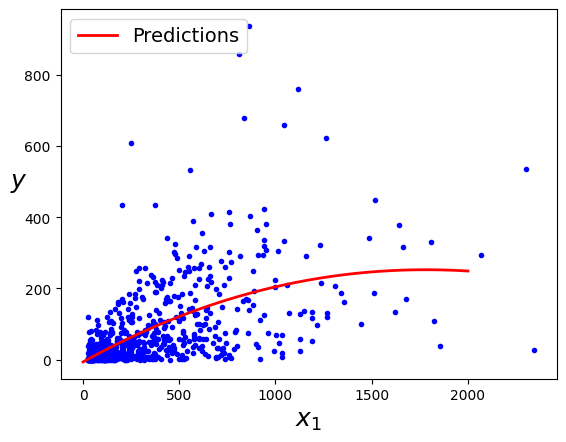

In [ ]:
#Plotting Results
plt.plot(X, y, "b.")
plt.plot(X_new3, polytestYnew3, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.show()


In [ ]:
print("Training error")

print("Mean absolute error: %.2f" % mean_absolute_error(y, polytrainYpred3))
print("root mean square error %.2f" % math.sqrt(mean_squared_error(y, polytrainYpred3)))
print("Mean sum of squares (MSE) : %.2f" % mean_squared_error(y, polytrainYpred3))

print("----------------")

print("Testing error")
print("Mean absolute error: %.2f" % mean_absolute_error(y, polytestYnew3))
print("root mean square error %.2f" % math.sqrt(mean_squared_error(y, polytestYnew3)))
print("Mean sum of squares (MSE) : %.2f" % mean_squared_error(y, polytestYnew3))


Training error
Mean absolute error: 55.42
root mean square error 92.31
Mean sum of squares (MSE) : 8521.38
----------------
Testing error
Mean absolute error: 152.08
root mean square error 177.18
Mean sum of squares (MSE) : 31391.16


10th Degree of Polynomial

In [ ]:
poly_features10 = PolynomialFeatures(degree=10, include_bias=False)
X_poly10 = poly_features10.fit_transform(X)
X[0]

lin_reg10 = LinearRegression()
lin_reg10.fit(X_poly10, y)
lin_reg10.intercept_, lin_reg.coef_

X_new10= np.linspace(0, 2000, 750).reshape(750, 1)
X_new_poly10 = poly_features10.transform(X_new10)

polytrainYpred10 = lin_reg10.predict(X_poly10)

polytestYnew10= lin_reg10.predict(X_new_poly10)

    


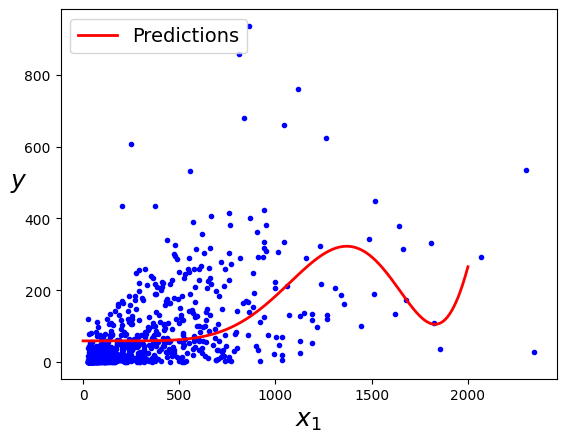

In [ ]:
#Plotting Results
plt.plot(X, y, "b.")
plt.plot(X_new10, polytestYnew10, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.show()

In [ ]:
print("Training error")

print("Mean absolute error: %.2f" % mean_absolute_error(y, polytrainYpred10))
print("root mean square error %.2f" % math.sqrt(mean_squared_error(y, polytrainYpred10)))
print("Mean sum of squares (MSE) : %.2f" % mean_squared_error(y, polytrainYpred10))

print("----------------")

print("Testing error")
print("Mean absolute error: %.2f" % mean_absolute_error(y, polytestYnew10))
print("root mean square error %.2f" % math.sqrt(mean_squared_error(y, polytestYnew10)))
print("Mean sum of squares (MSE) : %.2f" % mean_squared_error(y, polytestYnew3))


Training error
Mean absolute error: 67.43
root mean square error 102.17
Mean sum of squares (MSE) : 10438.02
----------------
Testing error
Mean absolute error: 136.59
root mean square error 170.54
Mean sum of squares (MSE) : 31391.16



3rd Polynomial Degree is bestfit.

#Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RepeatedKFold

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
Lasso_reg = Lasso(alpha=0.1)

In [ ]:
#fit model
Lasso_reg.fit(X_train,y_train)

Lasso(alpha=0.1)

In [ ]:
#Predict Y train
trainYLasPred = Lasso_reg.predict(X_train)
testLasPred= Lasso_reg.predict(X_test)

In [ ]:
print("Training error")

print("Mean absolute error: %.2f" % mean_absolute_error(y_train, trainYLasPred))
print("root mean square error %.2f" % math.sqrt(mean_squared_error(y_train, trainYLasPred)))
print("Mean sum of squares (MSE) : %.2f" % mean_squared_error(y_train, trainYLasPred))

print("----------------")

print("Testing error")
print("Mean absolute error: %.2f" % mean_absolute_error(testLasPred, y_test))
print("root mean square error %.2f" % math.sqrt(mean_squared_error(testLasPred, y_test)))
print("Mean sum of squares (MSE) : %.2f" % mean_squared_error(testLasPred, y_test))

Training error
Mean absolute error: 57.77
root mean square error 93.52
Mean sum of squares (MSE) : 8746.75
----------------
Testing error
Mean absolute error: 55.90
root mean square error 96.84
Mean sum of squares (MSE) : 9378.62


#KNN

In [ ]:
from sklearn import neighbors
n_neighbors=6
knn=neighbors.KNeighborsRegressor(n_neighbors,weights='uniform')
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=6)

In [ ]:
trainknn = knn.predict(X_train)
trainknn2 = knn.predict(X_test)
knn_score_train = knn.score(X_train, y_train)

print ("Training error")
print ( "Mean absolute error: %.2f" % mean_absolute_error(y_train, trainknn))
print ("root mean square error %.2f" % mean_squared_error(y_train, trainknn))
print ( "Mean sum of squares (MSE) : %.2f" % np.mean( (trainknn - y_train) ** 2))
print("Training score: ",knn_score_train)


Training error
Mean absolute error: 50.71
root mean square error 6972.70
Mean sum of squares (MSE) : 6972.70
Training score:  0.4413993567723965


In [ ]:
tesKnn= knn.predict(X_test)
knn_score_test = knn.score(X_test, y_test)

print ("Testing error" )

print ("Mean absolute error: %.2f" % mean_absolute_error(y_test, tesKnn))
print ("root mean squareerror %.2f" % mean_squared_error(y_test, tesKnn))
print( "Mean sum of squares (MSE) : %.2f" % np.mean( (tesKnn - y_test) ** 2))
print("Testing score: ",knn_score_test)

Testing error
Mean absolute error: 56.68
root mean squareerror 9638.40
Mean sum of squares (MSE) : 9638.40
Testing score:  0.32116649038758593


#### After seeing the results of the training errors and the testing errors of all the previous methods. We concluded that the Lasso Regression is the best fit compared to the polynomial features. This assumption is made based on a comparison of the gap between the training model and the testing model. 

# ff

In [ ]:

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.metrics import f1_score
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import rand_score

import numpy as np

from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN

import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import ward,dendrogram, linkage

from sklearn.datasets import make_blobs, make_moons, make_circles

from sklearn import metrics

from sklearn.metrics import f1_score
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics import jaccard_score
from sklearn.metrics.cluster import rand_score

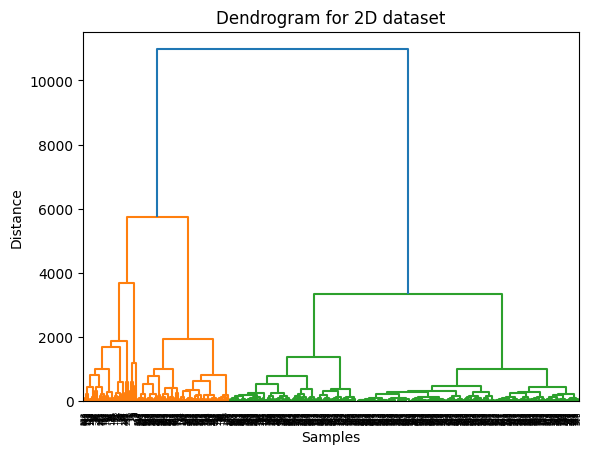

In [ ]:
#Linkage and dendogram

#Calculating the distances or similarities between all objects.
linked = linkage(df, 'ward') #SSE

dendrogram(linked,orientation='top',distance_sort='descending')

plt.axhline(y=4500, color='r', linestyle='--')

plt.title('Dendrogram for 2D dataset')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

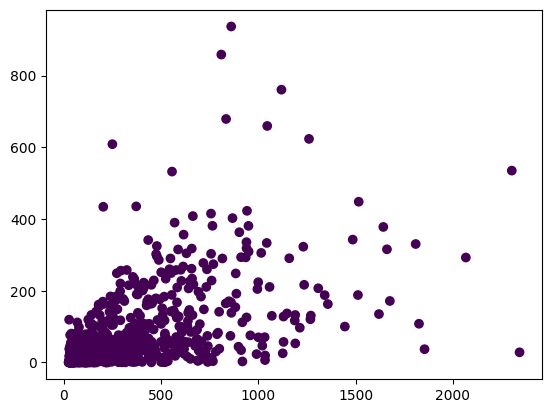

In [ ]:
dbscan = DBSCAN(eps=0.1,min_samples=2).fit(df)

labels = dbscan.fit_predict(df)

plt.scatter(df['No_of_Votes'], df['Gross'], c=labels, cmap='viridis');